#  Task 1

# Weather visualization

The purpose of this workbook is showing the step of anlayzing weather data, which consist temp(indoor, outdoor, range of temperature) ,pressure and rainfall amount in each day, since importing csv file without lib then explore data analysis. plot the graph and interpret. There are several process as below.

1. Import csv file
2. Create and Imprve Dataframe by Pandas Library
3. Plot the graph to show relation and correlation between variable
4. Group data as Monthly and Seasonal, Plot the graph and interpret

#  1. Import CSV file

Import csv file by calling read_csv function from the main. There are five processes transforming csv file to create dictation.

1. retrive data from csv in each line to full_data list
2. To collect the keys for dictionary by gathering all headers (columns name) to list_header list
3. To collect the values for dictionary. First, make some empty lists which have a same amount with list_header eg. There are 2 keys in dictionary, I will make 2 empty lists. one for DateTime  and another one for Barometer.
4. Insert all values from the line after header in full_data list by starting first column then choose data in each row untill final row to first list in empty (from step 4), After that it will move to next column and iterate same process.
5. Map keys and values then return completed dictionary

In [1]:
def read_csv(filename):
    ### load csv as a list first
    full_data=list()
    with open(filename) as file:
        for row in file:
            full_data.append(row.strip().split(','))
    ### load the header
    number_header=len(full_data[0])
    list_header=list()
    for i in range(number_header):
        list_header.append(full_data[0][i])
    adjust_list_header=list()
    for j in list_header:
        position_start=j.find('"')+1
        adjust_list_header.append(j[position_start:-1])
    ### Set a number of member 
    raw_data=full_data[1:]
    number_row=len(full_data[1:])
    lst=list()
    dict={}
    for j in range(number_header):
        lst.append([])
    
    ### Put the value in the list
    for i in range(number_header):
        for j in range(number_row):
                if i==0:
                    lst[i].append(raw_data[j][i][1:-1])
                else:
                    lst[i].append(float(full_data[1:][j][i]))
    
    ### Merge value and keys
    m=0
    for k in adjust_list_header:
        dict[k]=lst[m]
        m+=1
    
    
    return dict


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#####load Full data set
baro=read_csv('barometer-last-year.csv')
indoor=read_csv("indoor-temperature-last-year.csv")
outside=read_csv('outside-temperature-last-year.csv')
rainfall=read_csv('rainfall-last-year.csv')

# 2. Create and Improve Dataframe by using Pandas library

According from main, I already import pandas by assigning as pd, so i create the variable as number as expected import csv file

In [3]:
baro_df=pd.DataFrame(baro)
indoor_df=pd.DataFrame(indoor)
outside_df=pd.DataFrame(outside)
rainfall_df=pd.DataFrame(rainfall)

To make completed dataframe by merging each dataframe to one dataframe by using merge method in Pandas Lib. By focusing common columns such as DateTime which is assigned to 'df'. After that, i change type of data in columns Datatime to datetime type which will be easier to organize and manipulate data in further step. 

In [4]:
baro_indoor=baro_df.merge(indoor_df,on='DateTime',how='left')
baro_indoor_outside=baro_indoor.merge(outside_df,on='DateTime',how='left',suffixes=('_indoor','_outside'))
df=baro_indoor_outside.merge(rainfall_df,on='DateTime',how='left')
df['DateTime']= pd.to_datetime(df['DateTime'])

To show overview statistic value ( max,min,mean,std..) by calling method describe() and To show correlation in each variable in dataframe

In [5]:
df.columns=['DateTime','Pressure','Relative_Humidity', 'Temperature_indoor','Temperature_indoor_min',
            'Temperature_indoor_max','Temperature_outdoor','Temperature_outdoor_min','Temperature_outdoor_max','Rainfall']
df=df.round(2)

round(df.describe(),2)


,Pressure,Relative_Humidity,Temperature_indoor,Temperature_indoor_min,Temperature_indoor_max,Temperature_outdoor,Temperature_outdoor_min,Temperature_outdoor_max,Rainfall
count,355.00,354.00,354.00,354.00,354.00,355.00,355.00,355.00,353.00
mean,1010.00,48.52,21.83,20.56,23.53,11.14,7.87,15.52,1.55
std,9.87,5.19,2.06,2.41,1.70,5.36,4.88,7.03,3.32
min,979.60,37.00,18.04,14.90,19.70,-1.81,-4.10,1.50,0.00
25%,1004.85,44.00,20.34,18.73,22.50,7.39,4.35,10.25,0.00
50%,1010.50,48.00,21.71,20.60,23.20,10.96,8.00,15.10,0.00
75%,1016.05,52.00,22.71,21.90,24.10,15.05,12.05,19.85,1.10
max,1035.60,59.00,29.21,28.20,31.10,26.38,18.70,38.50,23.20


 Moreover if we look more closely. we will see the number of data is not equal that will effect the statistic characteristic, therefore we need to fill the empty data properly. I choose interpolate method by using method interpolate() as below

In [6]:
df[df.isna().any(axis=1)] ### show row which has empty value in any columns


,DateTime,Pressure,Relative_Humidity,Temperature_indoor,Temperature_indoor_min,Temperature_indoor_max,Temperature_outdoor,Temperature_outdoor_min,Temperature_outdoor_max,Rainfall
73,2016-12-22,1019.6,47.0,19.56,17.6,21.7,4.84,1.7,7.9,NaN
218,2017-05-17,1009.5,48.0,22.20,21.6,23.0,12.67,9.7,14.5,NaN
284,2017-07-22,999.4,NaN,NaN,NaN,NaN,14.36,10.6,18.5,1.0


Call interpolate method to fill NaN value by interpolated

In [7]:
df= df.interpolate()

# 3. Plot the graph to show relation and correlation between variable

Call corr() method then be assigned to 'corr' and visualize in Correlation heat map

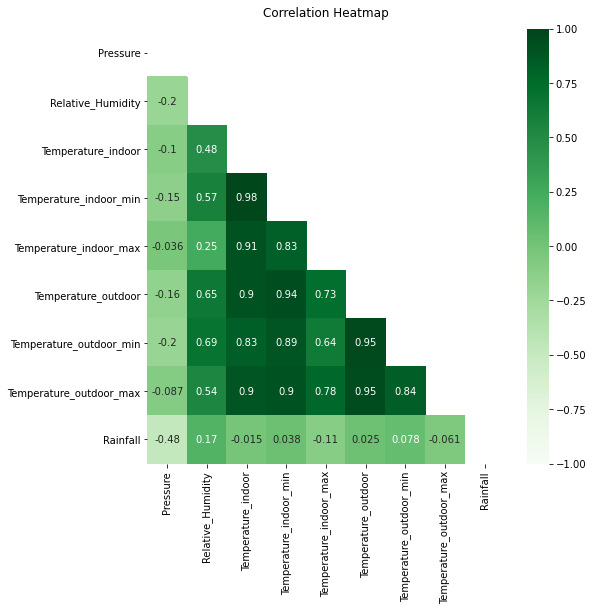

In [8]:
corr=df.corr()
mask = np.triu(np.ones_like(corr))
fig, ax = plt.subplots(figsize=(8,8))  
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True,mask=mask,cmap="Greens")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

As a result of heatmap, it displays that there are strong correlation between temperature outdoor and temperature indoor, moderate correlation between relative humidity and temperature (especially with outdoor case) and weak correlation between rainfall and pressure. For next step i choose scatter plot to reconfirm and see overview correlation in each pair as previous mentioned

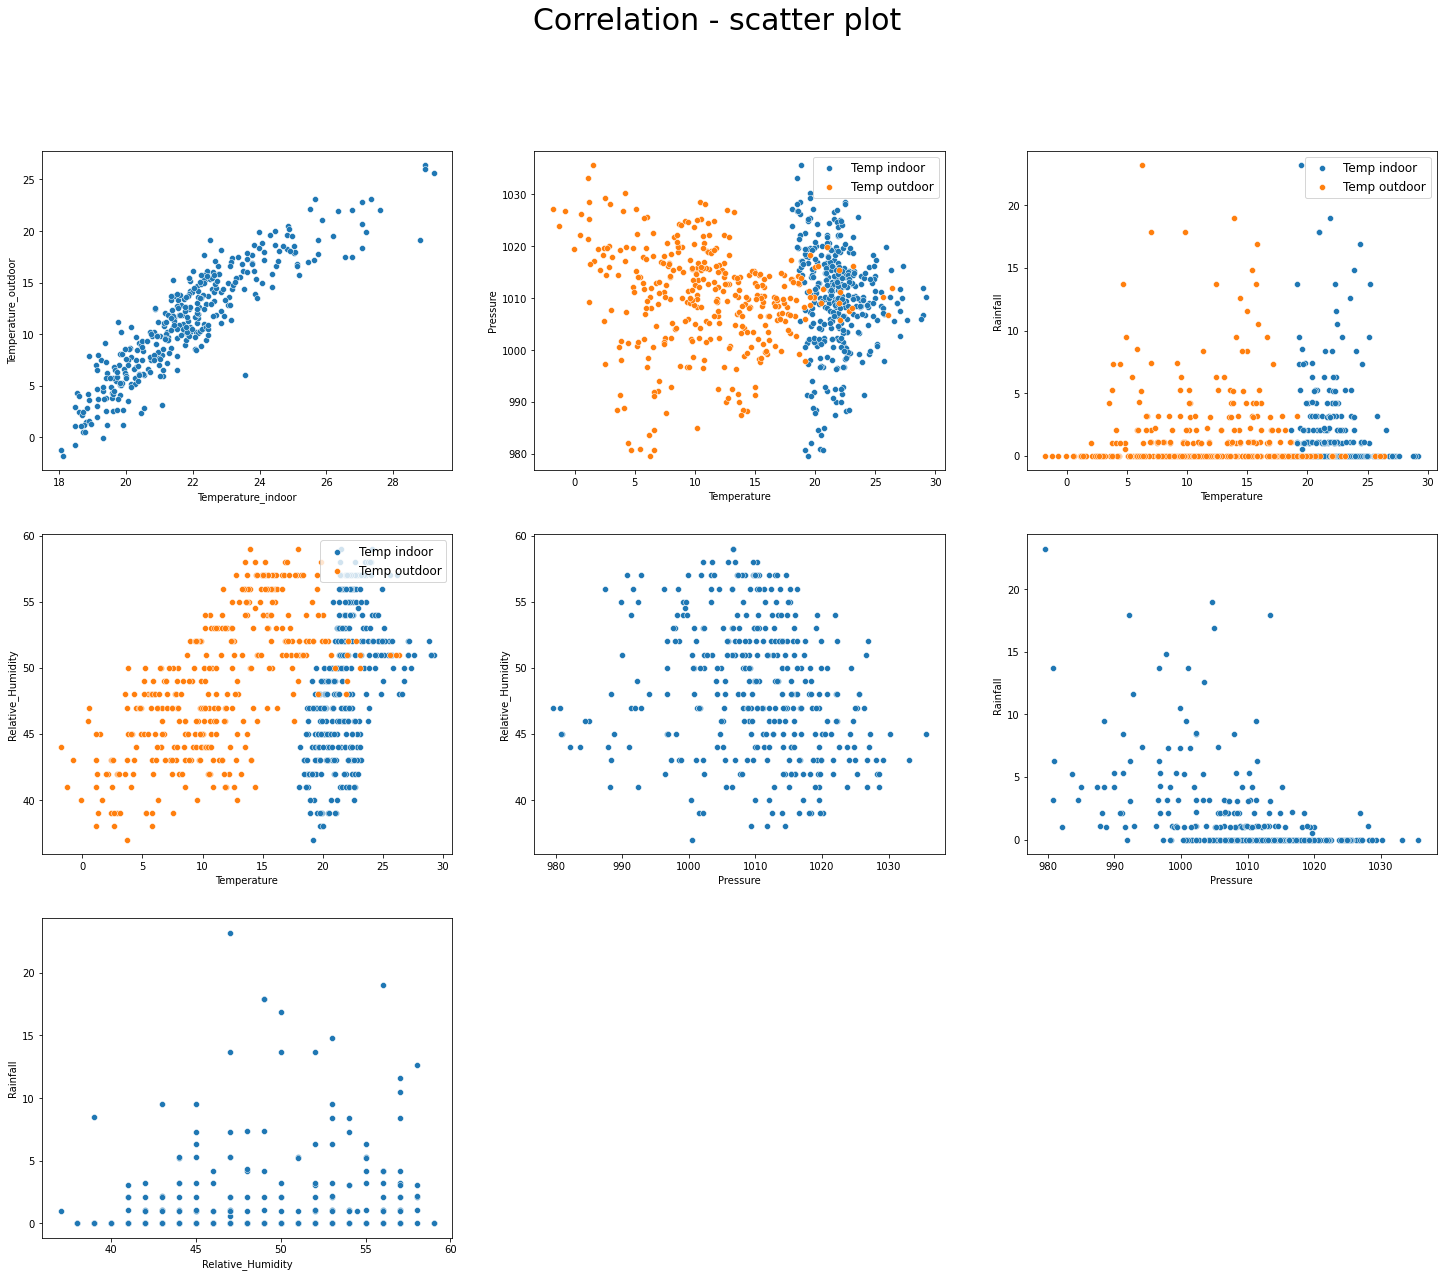

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(25, 20))
fig.suptitle('Correlation - scatter plot',fontsize=30)
sns.scatterplot(ax=axes[0,0],x=df.Temperature_indoor, y=df.Temperature_outdoor)

sns.scatterplot(ax=axes[0,1], x=df.Temperature_indoor, y=df.Pressure, label='Temp indoor')
sns.scatterplot(ax=axes[0,1], x=df.Temperature_outdoor, y=df.Pressure,label='Temp outdoor')
axes[0,1].legend(fontsize='12',loc='upper right')
axes[0,1].set(xlabel='Temperature')

sns.scatterplot(ax=axes[0,2], x=df.Temperature_indoor, y=df.Rainfall, label='Temp indoor')
sns.scatterplot(ax=axes[0,2], x=df.Temperature_outdoor, y=df.Rainfall,label='Temp outdoor')
axes[0,2].legend(fontsize='12',loc='upper right')
axes[0,2].set(xlabel='Temperature')

sns.scatterplot(ax=axes[1,0], x=df.Temperature_indoor, y=df.Relative_Humidity, label='Temp indoor')
sns.scatterplot(ax=axes[1,0], x=df.Temperature_outdoor, y=df.Relative_Humidity,label='Temp outdoor')
axes[1,0].legend(fontsize='12',loc='upper right')
axes[1,0].set(xlabel='Temperature')

sns.scatterplot(ax=axes[1,1], x=df.Pressure, y=df.Relative_Humidity)


sns.scatterplot(ax=axes[1,2], x=df.Pressure, y=df.Rainfall)


sns.scatterplot(ax=axes[2,0], x=df.Relative_Humidity, y=df.Rainfall)

fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])
#plt.savefig('appendix2.png')

# 4. Group data as Monthly and Seasonal, Plot the graph and interpret


To seperate data as group of month and seasonal. i choose method .loc() as code below

In [10]:
df.loc[(df['DateTime'].dt.month>7)&(df['DateTime'].dt.month<11),'Seasonal']='Autumn'
df.loc[(df['DateTime'].dt.month==1) | (df['DateTime'].dt.month>=11),'Seasonal']='Winter'
df.loc[(df['DateTime'].dt.month>1)&(df['DateTime'].dt.month<5),'Seasonal']='Spring'
df.loc[(df['DateTime'].dt.month>4)&(df['DateTime'].dt.month<8),'Seasonal']='Summer'
df.loc[df['DateTime'].dt.month==9,'Month']='Sep'
df.loc[df['DateTime'].dt.month==10,'Month']='Oct'
df.loc[df['DateTime'].dt.month==11,'Month']='Nov'
df.loc[df['DateTime'].dt.month==12,'Month']='Dec'
df.loc[df['DateTime'].dt.month==1,'Month']='Jan'
df.loc[df['DateTime'].dt.month==2,'Month']='Feb'
df.loc[df['DateTime'].dt.month==3,'Month']='Mar'
df.loc[df['DateTime'].dt.month==4,'Month']='Apr'
df.loc[df['DateTime'].dt.month==5,'Month']='May'
df.loc[df['DateTime'].dt.month==6,'Month']='Jun'
df.loc[df['DateTime'].dt.month==7,'Month']='Jul'
df.loc[df['DateTime'].dt.month==8,'Month']='Aug'

Create dataframe for monthly and seasonal data. 

In [11]:
df_seasonal=round(df.groupby('Seasonal').mean(),2)
df_seasonal.reset_index(inplace=True)
sort_seasonal=['Winter','Spring','Summer','Autumn']
df_seasonal['Seasonal']=df_seasonal['Seasonal'].astype('category')
df_seasonal['Seasonal'].cat.set_categories(sort_seasonal,inplace=True)
df_seasonal=df_seasonal.sort_values(['Seasonal'])

df_seasonal_min=round(df.groupby('Seasonal').min(),2)
df_seasonal_min.reset_index(inplace=True)
sort_seasonal=['Winter','Spring','Summer','Autumn']
df_seasonal_min['Seasonal']=df_seasonal_min['Seasonal'].astype('category')
df_seasonal_min['Seasonal'].cat.set_categories(sort_seasonal,inplace=True)
df_seasonal_min=df_seasonal_min.sort_values(['Seasonal'])


df_month_max=round(df.groupby('Month').max(),2)
df_seasonal_max=round(df.groupby('Seasonal').max(),2)
df_seasonal_max.reset_index(inplace=True)
sort_seasonal=['Winter','Spring','Summer','Autumn']
df_seasonal_max['Seasonal']=df_seasonal_max['Seasonal'].astype('category')
df_seasonal_max['Seasonal'].cat.set_categories(sort_seasonal,inplace=True)
df_seasonal_max=df_seasonal_max.sort_values(['Seasonal'])


In [12]:
df_month=round(df.groupby('Month').mean(),2)

df_month.reset_index(inplace=True)
sort_month=['Nov','Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
df_month['Month']=df_month['Month'].astype('category')
df_month['Month'].cat.set_categories(sort_month,inplace=True)
df_month=df_month.sort_values(['Month'])

#  Temperature (indoor and outdoor) vs Humidity (Based on  avearage monthly)

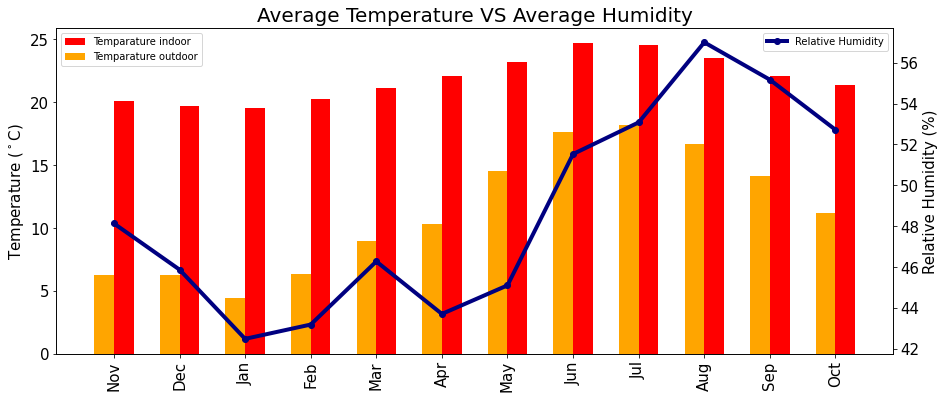

In [13]:
x=np.arange(12)
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(x+0.15,df_month['Temperature_indoor'],label='Temparature indoor',width=0.3,color='r')
ax.bar(x-0.15,df_month['Temperature_outdoor'],label='Temparature outdoor',width=0.3,color='orange')
plt.xticks(x, df_month['Month'], rotation ='vertical',fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Temperature ($^\circ$C)',fontsize=15)

plt.legend(loc='upper left')

ax2 = ax.twinx()
ax2.plot(x,df_month['Relative_Humidity'],marker='o', c='navy', linewidth=4,label='Relative Humidity')
plt.title('Average Temperature VS Average Humidity',fontsize=20)
plt.ylabel('Relative Humidity (%)',fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right')

# Rainfall VS Pressure  (Based on  avearage monthly)

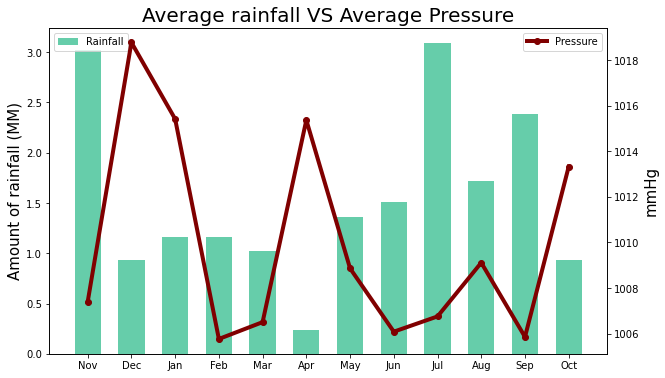

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df_month['Month'],df_month['Rainfall'],color='mediumaquamarine',label='Rainfall',width=0.6)
plt.ylabel('Amount of rainfall (MM)',fontsize=15)
plt.yscale('linear')
plt.title('Average rainfall VS Average Pressure',fontsize=20)
plt.legend(loc='upper left')
ax2 = ax.twinx()
ax2.plot(df_month['Month'],df_month['Pressure'],marker='o', c='maroon', linewidth=4, label='Pressure')
plt.ylabel('mmHg',fontsize=15)

plt.legend(loc='upper right')

# Range of Tempereture indoor and outdoor (Base on average seasonal)

Text(0.5, 1.0, 'Range Temparature in Seasonal')

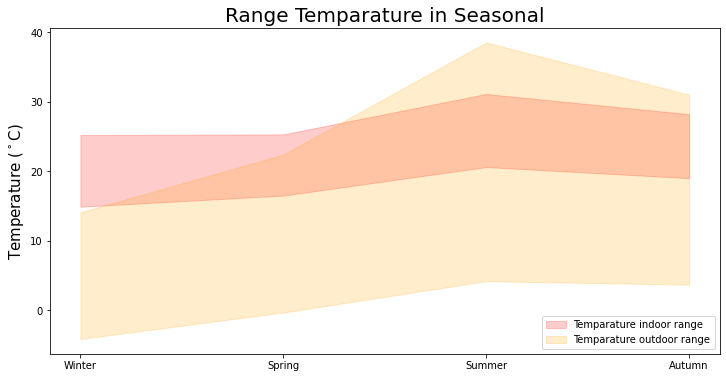

In [15]:
fig, ax = plt.subplots(sharex=True,figsize=(12, 6))
ax.fill_between(df_seasonal['Seasonal'],df_seasonal_max['Temperature_indoor_max'],df_seasonal_min['Temperature_indoor_min']
                ,label='Temparature indoor range',color='red',alpha=0.2)
ax.fill_between(df_seasonal['Seasonal'],df_seasonal_max['Temperature_outdoor_max'],df_seasonal_min['Temperature_outdoor_min']
                ,label='Temparature outdoor range',color='orange',alpha=0.2)



plt.ylabel('Temperature ($^\circ$C)',fontsize=15)
plt.legend(loc='lower right')
plt.title('Range Temparature in Seasonal',fontsize=20)

# Pie chart Total rainfall in each seasonal 

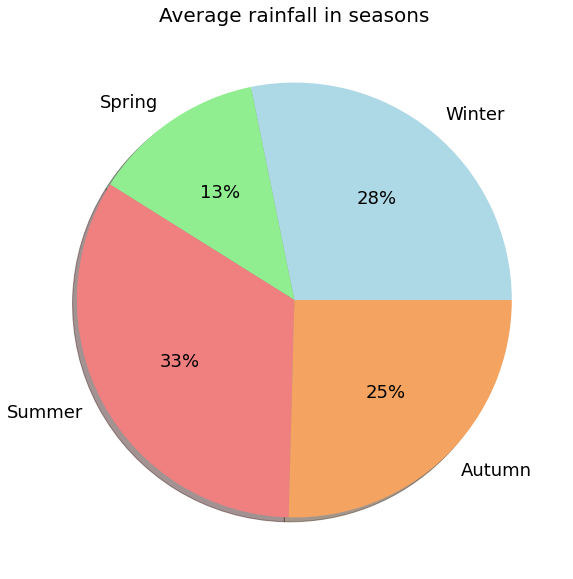

In [16]:
df_seasonal=round(df.groupby('Seasonal').sum(),2)
df_seasonal.reset_index(inplace=True)
sort_seasonal=['Winter','Spring','Summer','Autumn']
df_seasonal['Seasonal']=df_seasonal['Seasonal'].astype('category')
df_seasonal['Seasonal'].cat.set_categories(sort_seasonal,inplace=True)
df_seasonal=df_seasonal.sort_values(['Seasonal'])

df_seasonal_rain=df_seasonal['Rainfall']


colors = ['lightblue','lightgreen','lightcoral','sandybrown']

#create pie chart
fig = plt.subplots(figsize=(10,10))
plt.pie(df_seasonal_rain, labels = sort_seasonal, colors = colors, autopct='%.0f%%',shadow=True,textprops={'fontsize': 18})
plt.title('Average rainfall in seasons',fontsize=20)
plt.show()